Original Audio:


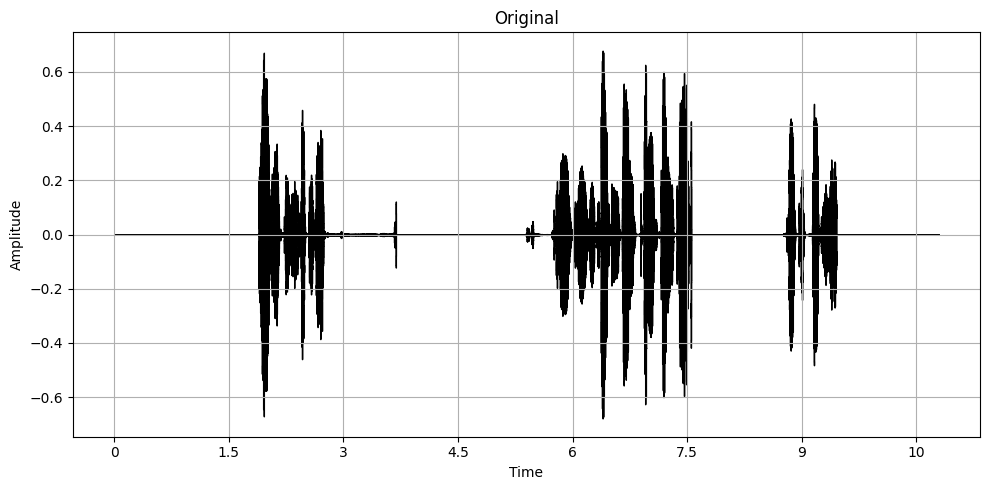

Trimmed Audio:


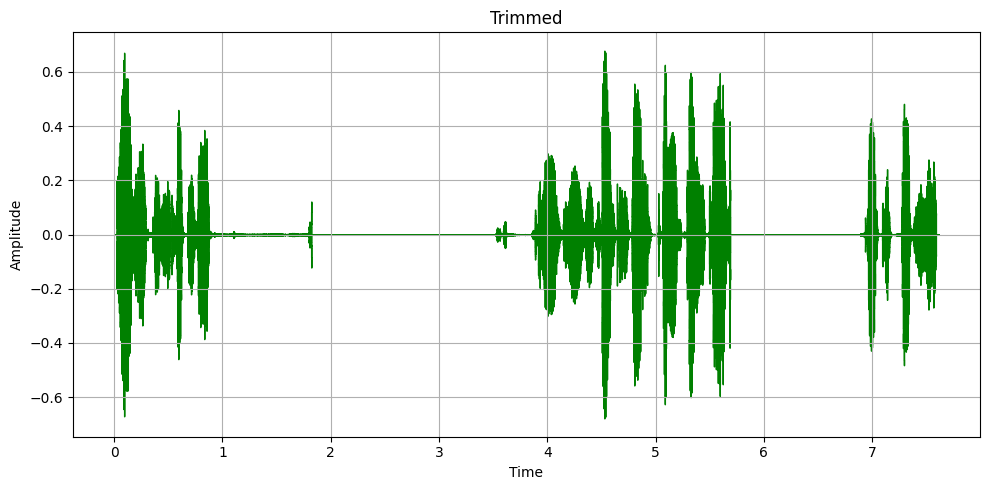

In [40]:
# Import necessary libraries
import librosa  # For audio processing
import soundfile as sf  # For saving audio files
import IPython.display as ipd  # For audio playback
import matplotlib.pyplot as plt  # For plotting
import numpy as np  # For numerical operations

# Load the original audio file
original_audio, sr = librosa.load('ruchith.mp3', sr=None)

# Trim the silent sections from the original audio
trimmed_audio, index = librosa.effects.trim(original_audio)

# Write the trimmed audio to a WAV file
sf.write('trimmed_audio.wav', trimmed_audio, sr)

# Load the trimmed audio from the saved WAV file
trimmed, sr1 = librosa.load('trimmed_audio.wav', sr=None)

# Display the original audio using IPython.display
print("Original Audio:")
ipd.display(ipd.Audio(original_audio, rate=sr))

# Plot the waveform of the original audio
plt.figure(figsize=(10, 5))
librosa.display.waveshow(original_audio, sr=sr, color='black')
plt.title('Original')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()
plt.show()

# Display the trimmed audio using IPython.display
print("Trimmed Audio:")
ipd.display(ipd.Audio(trimmed_audio, rate=sr))

# Plot the waveform of the trimmed audio
plt.figure(figsize=(10, 5))
librosa.display.waveshow(trimmed, sr=sr1, color='green')
plt.title('Trimmed')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()
plt.show()


Splitting with top_db=1


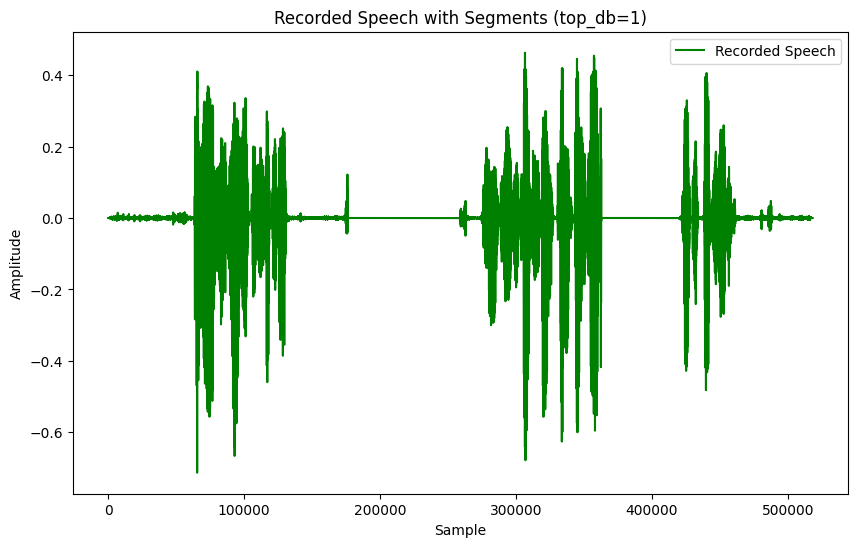

Splitting with top_db=10


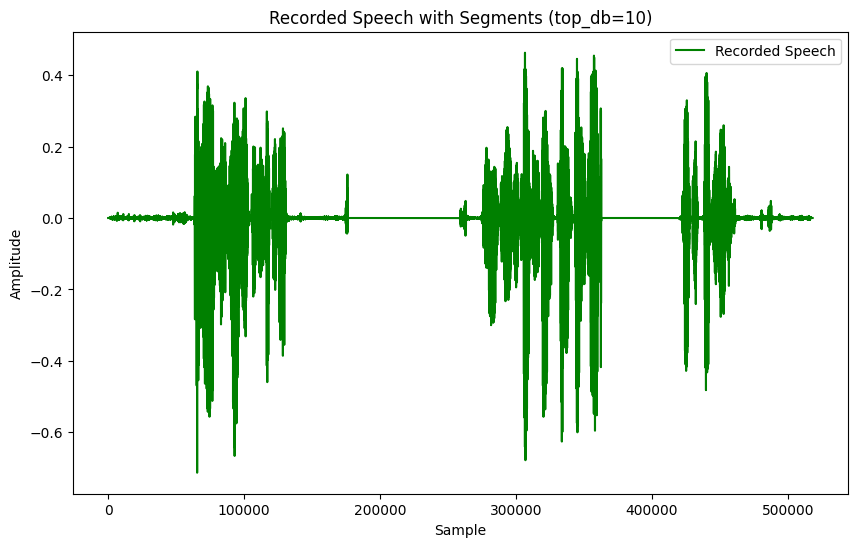

Splitting with top_db=20


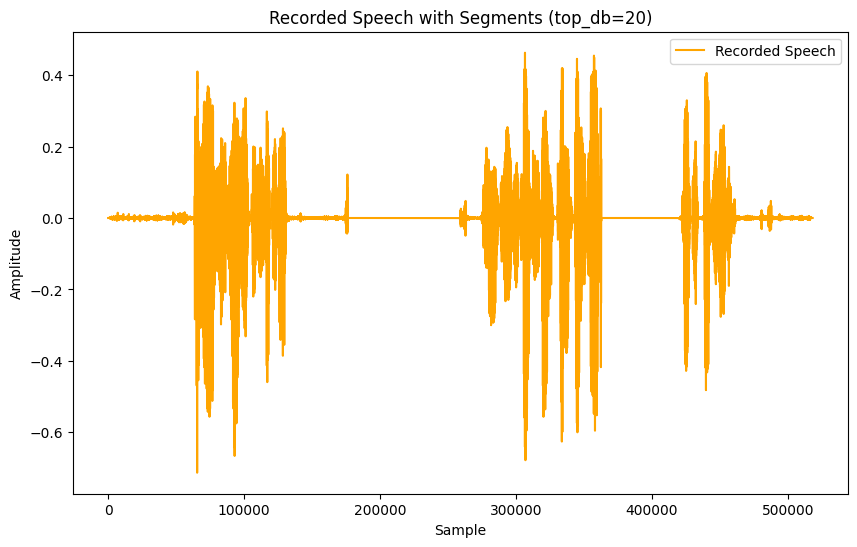

Splitting with top_db=40


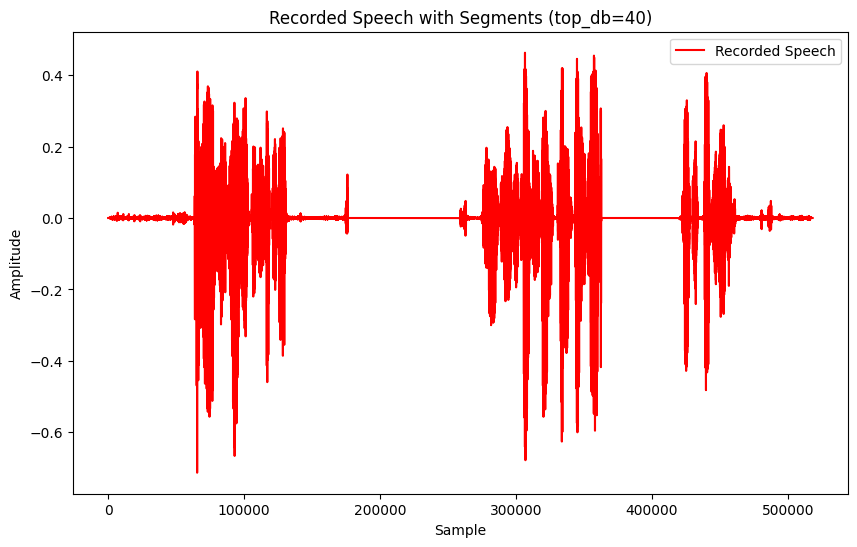

Listening to segments with top_db=1:


Listening to segments with top_db=10:


Listening to segments with top_db=20:


Listening to segments with top_db=40:


In [36]:
import librosa
import soundfile as sf
import IPython.display as ipd
import random
import matplotlib.pyplot as plt

# Load the recorded speech and its sampling rate
recorded_speech, sr = librosa.load('ruchith.mp3', sr=None)

# Define a function to split the audio into segments and save them
def split_and_save(top_db):
    # Split the recorded speech into segments based on energy threshold
    segments = librosa.effects.split(recorded_speech, top_db=top_db)
    # Define colors for plotting
    colors = ['blue', 'red', 'green', 'orange']
    # Plot the recorded speech waveform
    plt.figure(figsize=(10, 6))
    plt.plot(recorded_speech, color=random.choice(colors), label='Recorded Speech')

    # Iterate over segments, save each segment as a WAV file, and plot the segment boundaries
    for i, segment in enumerate(segments):
        start, end = segment
        segment_audio = recorded_speech[start:end]  # Extract the segment
        sf.write(f'segment_{i}.wav', segment_audio, sr)  # Save the segment as a WAV file

    # Plot segment boundaries on the waveform plot
    plt.title(f"Recorded Speech with Segments (top_db={top_db})")
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.show()

# Define top_db values for splitting
top_db_values = [1, 10, 20, 40]

# Iterate over top_db values, split the audio, save segments, and plot the waveform with segments
for top_db in top_db_values:
    print(f"Splitting with top_db={top_db}")
    split_and_save(top_db)

# Listen to the generated signals
for i in range(len(top_db_values)):
    print(f"Listening to segments with top_db={top_db_values[i]}:")
    # Iterate over saved segments for each top_db value and play them
    for j in range(len(librosa.effects.split(recorded_speech, top_db=top_db_values[i]))):
        ipd.display(ipd.Audio(f'segment_{j}.wav'))


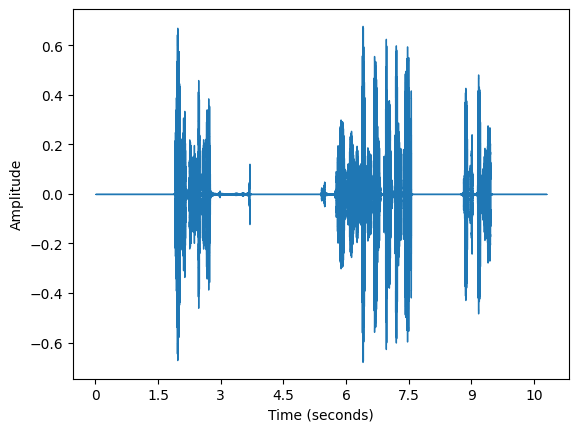

(1025, 507)


80.0

In [60]:
#A2

# Load the audio file and its sampling rate
signal, sr = librosa.load("ruchith.mp3", sr=None)

# Import necessary functions from librosa and matplotlib
from librosa import display
import matplotlib.pyplot as plt 

# Plot the waveform of the audio signal
plt.figure()
librosa.display.waveshow(y=signal, sr=sr) 
plt.xlabel("Time (seconds)") 
plt.ylabel("Amplitude") 
plt.show()

# Define the number of FFT points
n_fft = 2048

# Compute the Short-Time Fourier Transform (STFT) of the audio signal
S = librosa.stft(signal, n_fft=n_fft, hop_length=n_fft//2)

# Print the shape of the STFT matrix
print(S.shape)

# Convert the magnitude spectrogram to dB scale
D = librosa.amplitude_to_db(np.abs(S), ref=np.max) 

# Compute the maximum amplitude in decibels (dB)
max_amplitude_db = np.max(abs(D))

# Print the maximum amplitude in dB
print(max_amplitude_db)


In [52]:
no_mute = librosa.effects.split(signal)
no_mute

array([[ 89600, 178176],
       [258048, 364032],
       [419328, 455168]])

In [55]:
def displayTime(startFrame, endFrame):    
    print(' start time: ' + str(startFrame/sr) + ', end time: ' + str(endFrame/sr))
for i in no_mute:
    displayTime(i[0],i[1])

 start time: 1.8666666666666667, end time: 3.712
 start time: 5.376, end time: 7.584
 start time: 8.736, end time: 9.482666666666667


 start time: 1.8666666666666667, end time: 3.712
 start time: 5.376, end time: 7.584
 start time: 8.736, end time: 9.482666666666667


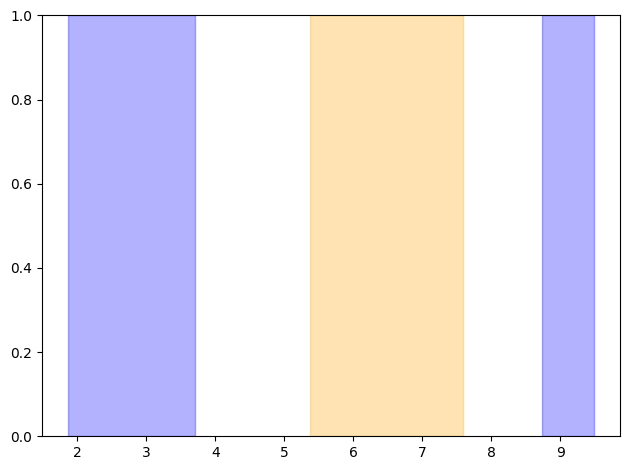

In [59]:
for i, (start, end) in enumerate(no_mute):
    displayTime(start, end)
    if i % 2 == 0:
        plt.axvspan(start/sr, end/sr, color='blue', alpha=0.3)  # Plot silence segments in blue
    else:
        plt.axvspan(start/sr, end/sr, color='orange', alpha=0.3)  # Plot non-silence segments in orange

plt.tight_layout()
plt.show()

C:\Users\blruc\AppData\Local\Temp\ipykernel_15532\760069857.py:4: RuntimeWarning: divide by zero encountered in log10
  signal_db = 20 * np.log10(np.abs(signal) / max_amplitude)


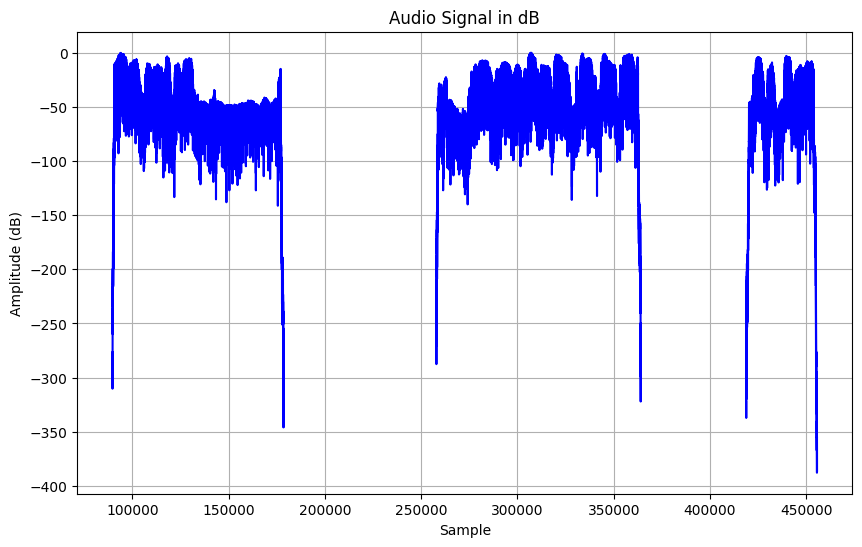

In [44]:
max_amplitude = np.max(np.abs(signal))

# Convert amplitude to dB
signal_db = 20 * np.log10(np.abs(signal) / max_amplitude)

# Plot the dB representation of the signal
plt.figure(figsize=(10, 6))
plt.plot(signal_db, color='blue')
plt.xlabel('Sample')
plt.ylabel('Amplitude (dB)')
plt.title('Audio Signal in dB')
plt.grid(True)
plt.show()